** The CNN network for happiness recognition**

We implement the recognition of emotion, which will be used for labeling videos.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


# GPU
gpu_device = 0
torch.cuda.set_device(gpu_device)
print('Chosen GPU device: ' + str(torch.cuda.current_device()))

Chosen GPU device: 0


In [4]:
from make_dataloader import *
import pickle
load = False
batch_size = 75
try:
    if load:
        loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))
    else:
        make_dataloader(only_two = True, batch_size = batch_size)
        loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))
except (OSError, IOError) as e:
    make_dataloader(only_two = True, batch_size = batch_size)
    loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))

Data preprocessed and loaders saved in :
./fer2013/fer2013Loaders.p


In [5]:
train_loader = loaders['train_loader']
valid_loader = loaders['valid_loader']
test_loader = loaders['test_loader']

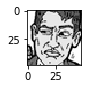

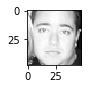

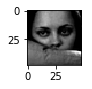

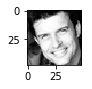

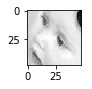

In [18]:
a = 0
for img,j in train_loader:
    plt.figure(figsize = (10,1))
    plt.imshow(img[0].numpy()[0], cmap="Greys_r")
    plt.show()
    a+=1
    if a >4:
        break

In [156]:
from emoCNN import *
import emoSolver
model = emoCNNnet(kernels = [12,6])
solver = emoSolver.emoSolver(optim_args={"lr": 0.01})

<bound method Module.parameters of emoCNNnet (
  (feature): Sequential (
    (0): Conv2d(1, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Conv2d(12, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (4): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True)
    (5): ReLU ()
  )
  (classifier): Sequential (
    (0): Linear (27648 -> 100)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Linear (100 -> 2)
  )
)>


Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.2191
          ...             ⋱             ...          
 0.0744  0.0000  0.0000  ...   0.0752  0.2745  0.4652
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.1475  0.3557
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

<class 'torch.FloatTensor'>
[[ 156.  184.  198. ...,  157.  154.  150.]
 [ 146.  182.  199. ...,  161.  154.  150.]
 [ 135.  176.  195. ...,  165.  161.  155.]
 ..., 
 [  28.   25.   21. ...,  179.  175.  173.]
 [  29.   18.   22. ...,  177.  172.  169.]
 [  21.   14.   23. ...,  172.  167.  161.]] (48, 48) <class 'numpy.ndarray'>


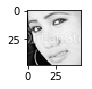

Variable containing:
-1.7602
 1.4922
[torch.cuda.FloatTensor of size 2 (GPU 0)]



In [195]:
a = 0
import scipy.misc
for img,j in train_loader:
    result = model(Variable(img).cuda(0))
    print(type(img))
    for i in range(1,2):
        plt.figure(figsize = (10,1))
        plt.imshow(img[i].numpy()[0], cmap="Greys_r")
        a = img[i].numpy()[0]
        SE = a
        print(a,a.shape, type(a))
        scipy.misc.imsave("test"+str(i)+".jpg",a)        
        plt.show()    
        print(result[i])
    break

In [159]:
solver.train(model, train_loader, valid_loader, log_nth=100, num_epochs=3)

START TRAIN.
Variable containing:
 0.0686  0.1769  0.2165  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0070  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0703  0.1915  0.2617  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

[iteration 0/141] TRAIN loss : 0.421989
Variable containing:
 0.1517  0.2876  0.3534  ...   0.0000  0.0000  0.0000
 0.0000  0.0215  0.1029  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0609  0.0000  0.0098
 0.1544  0.3044  0.4026  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0795  0.0165  0.0150
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.0000  0.0000  0.0000  .


Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.1679  0.2610  0.3208  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.2192  0.3187  0.3663  ...   0.0000  0.0000  0.0000
 0.1786  0.2519  0.2745  ...   0.0000  0.0000  0.0000
 0.0000  0.0098  0.0370  ...   0.0000  0.0000  0.0000
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.2376  0.3274  0.3451  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.1257  0.2031  0.2520  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0041  0.0466  0.0797  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.2831  0.3942  0.4511  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000 


Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.3015  0.3764  0.4954
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.1711
          ...             ⋱             ...          
 0.0881  0.0382  0.0000  ...   0.0000  0.0000  0.0000
 0.0114  0.0000  0.0000  ...   0.0621  0.2345  0.3982
 0.0000  0.0000  0.0000  ...   0.0000  0.0451  0.2577
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.2784  0.0998  0.0000  ...   0.4267  0.5499  0.6447
 0.0717  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.1308  0.0122  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0183  0.0000  0.0000  ...   0.0000  0.0000  0.0766
 0.1174  0.0656  0.0897  ...   0.0000  0.0000  0.1198
 0.0858  0.0000  0.0000  ...   0.0150  0.2048  0.3989
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.2077  0.1391  0.1081  ...   0.2499  0.3904  0.5468
 0.2863  0.2509  0.1977 

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0017
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0041
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0259
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0407
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0354  0.2285
 0.0000  0.0000  0.0000  ...   0.0000  0.0840  0.2848
 0.3559  0.4189  0.4981  ...   0.0000  0.0151  0.2283
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.1736
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.1791
 0.1630  0.1001  0.0425  ...   0.0000  0.0000  0.1083
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0702
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.1230
          ...             ⋱             ...          
 0.4810  0.6033  0.7170  ...   0.0000  0.0000  0.1166
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.1884
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.1126
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.1635  0.1630  0.2066  ...   0.0000  0.0237  0.2440
 0.0000  0.0000  0.0000  

Variable containing:
 0.0063  0.0000  0.0000  ...   0.0947  0.2630  0.4488
 0.1573  0.2155  0.2927  ...   0.0655  0.2498  0.4364
 0.2155  0.2072  0.1770  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0158  0.0000  0.0000  ...   0.0000  0.0000  0.2226
 0.0000  0.0000  0.0000  ...   0.0595  0.2183  0.4015
 0.0000  0.0000  0.0000  ...   0.0344  0.2061  0.4028
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0279  0.2232
 0.0208  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0145  0.1607  0.3272
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.1997
 0.1506  0.2015  0.2690  ...   0.0000  0.0000  0.0604
 0.0000  0.0000  0.0000  ...   0.0557  0.2146  0.3806
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.1226
 0.0077  0.0086  0.0220  

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0640  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0558  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0110
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

[iteration 100/141] VALID acc/loss : 0.842667/0.356392
Variable containing:
 0.0000  0.0000  0.0000 

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0543  0.1273  0.2151
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.1666  0.1650  0.1223  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0633  0.0064  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0025  0.0929  0.1989
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0854
 0.0000  0.0000  0.0109  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.1016  0.1651  0.2436
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0184  0.0000  0.0000  ...   0.0684  0.1505  0.2451
 0.1522  0.0381  0.0000  ...   0.0997  0.1634  0.2429
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  

[Epoch 2/3] TRAIN acc/loss : 0.840000/0.406669
Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.2191
          ...             ⋱             ...          
 0.0744  0.0000  0.0000  ...   0.0752  0.2745  0.4652
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.1475  0.3557
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.0336  0.0963  0.1347  ...   0.0000  0.0959  0.3473
 0.0886  0.0000  0.0000  ...   0.0000  0.0000  0.0784
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0608
          ...             ⋱             ...          
 0.0860  0.0085  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0545
 0.1432  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.cuda.FloatTensor of size 75x27648 (GPU 0)]

Variable containing:
 0.0269  0.0000  0.0000  ...   0

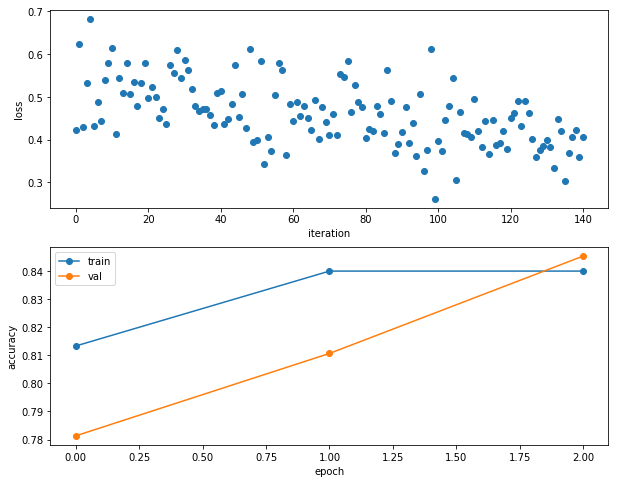

In [160]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(solver.train_loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [161]:
import pickle
torch.save(model.state_dict(),'./emoCNNtrivialdic')

In [162]:
m = torch.load(open('./emoCNNtrivialdic','rb'))
m2 = emoCNNnet(kernels = [12,6])
m2.load_state_dict(torch.load('./emoCNNtrivialdic'))
m2

<bound method Module.parameters of emoCNNnet (
  (feature): Sequential (
    (0): Conv2d(1, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Conv2d(12, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (4): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True)
    (5): ReLU ()
  )
  (classifier): Sequential (
    (0): Linear (27648 -> 100)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Linear (100 -> 2)
  )
)>


emoCNNnet (
  (feature): Sequential (
    (0): Conv2d(1, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Conv2d(12, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (4): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True)
    (5): ReLU ()
  )
  (classifier): Sequential (
    (0): Linear (27648 -> 100)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Linear (100 -> 2)
  )
)

<class 'numpy.ndarray'>

(0 ,0 ,.,.) = 
  1.6000e+02  1.8700e+02  2.0000e+02  ...   1.6300e+02  1.5700e+02  1.5200e+02
  1.5300e+02  1.8800e+02  2.0100e+02  ...   1.6700e+02  1.6200e+02  1.5800e+02
  1.3700e+02  1.8700e+02  2.0000e+02  ...   1.6900e+02  1.6500e+02  1.6200e+02
                 ...                   ⋱                   ...                
  2.9000e+01  2.3000e+01  2.7000e+01  ...   1.8600e+02  1.8200e+02  1.8100e+02
  3.1000e+01  2.3000e+01  2.8000e+01  ...   1.8000e+02  1.7600e+02  1.7400e+02
  2.1000e+01  1.3000e+01  2.2000e+01  ...   1.7600e+02  1.7100e+02  1.6800e+02
[torch.FloatTensor of size 1x1x48x48]

Variable containing:
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0270
[torch.cuda.FloatTensor of size 1x27648 (GPU 0)]



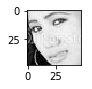

In [212]:
import modelInterface
import cv2
from PIL import Image
#a = ['../youtube/video/RwKzPEF6ssw/320face.jpg','../youtube/video/RwKzPEF6ssw/620face.jpg']
a = ['test0.jpg','test1.jpg']
#img_array = cv2.imread(a[1],0)
img_array = scipy.misc.imread(a[1])
#img_array = list(img_array.getdata())
#img_array = np.array(img_array)
img_array = img_array.reshape((48,48))
im = img_array.astype(np.float64)+0.0001
print(type(im))
#for i in im:
#    print(i)
TT = torch.from_numpy(im).unsqueeze(0).unsqueeze(0).float()
print(TT)
model_res = model(Variable(TT,requires_grad=False).cuda(0)).cpu()
plt.figure(figsize = (10,1))
plt.imshow(img_array, cmap="Greys_r")
plt.show()
#modelInterface.processImagesBatch(a,model = model)

In [211]:
TT
model_res
#SE

Variable containing:
-0.4093  0.5232
[torch.FloatTensor of size 1x2]